<a href="https://colab.research.google.com/github/ninja-josh/sales-predictions/blob/main/sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Sales

## Data Dictionary

![Data Dictionary](https://github.com/ninja-josh/image-storage/raw/main/Project%201%20Data%20Dictionary.png)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/ninja-josh/sales-predictions/main/data/sales_predictions.csv?token=AVQW6F6BCQDXFXMKNJK65HLBN4XTA'
df = pd.read_csv(url)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Exploration

In [ ]:
# Number of columns and rows
df.shape

(8523, 12)

In [ ]:
# check datatypes

df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
df.duplicated().sum()

0

# Missing Data

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

columns 'Item_Weight' and 'Outlet_Size' are missing data, let's take a closer look.

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df[df['Item_Weight'].isna()].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,0.0,1463.000000,1463.000000,1463.0,1463.000000
mean,NaN,0.076597,139.796485,1985.0,2483.677474
std,NaN,0.063012,61.617672,0.0,2347.516621
min,NaN,0.000000,31.290000,1985.0,33.955800
25%,NaN,0.029545,92.630400,1985.0,399.480000
50%,NaN,0.060588,143.781200,1985.0,1845.597600
75%,NaN,0.110718,184.426600,1985.0,3968.168000
max,NaN,0.328391,266.588400,1985.0,13086.964800


In [ ]:
df[df['Outlet_Establishment_Year'] == 1985].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,0.0,1463.000000,1463.000000,1463.0,1463.000000
mean,NaN,0.076597,139.796485,1985.0,2483.677474
std,NaN,0.063012,61.617672,0.0,2347.516621
min,NaN,0.000000,31.290000,1985.0,33.955800
25%,NaN,0.029545,92.630400,1985.0,399.480000
50%,NaN,0.060588,143.781200,1985.0,1845.597600
75%,NaN,0.110718,184.426600,1985.0,3968.168000
max,NaN,0.328391,266.588400,1985.0,13086.964800


rows missing data in 'Item_Weight' are all from 1985.  All data from 1985 is missing 'Item_Weight' data.  This is the earliest year of the data, so I don't feel we will lose too much data by dropping them.

In [ ]:
df = df.dropna(subset=['Item_Weight'])
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df[df['Outlet_Size'].isna()].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,2410.000000,2410.000000,2410.000000,2410.000000,2410.000000
mean,12.778479,0.070259,140.322946,2003.000000,1822.626947
std,4.589825,0.055029,62.397904,3.506502,1557.858015
min,4.590000,0.000000,32.090000,1998.000000,33.290000
25%,8.785000,0.028744,93.096200,2002.000000,554.777850
50%,12.600000,0.056414,142.165400,2002.000000,1443.454400
75%,16.700000,0.100364,185.135800,2007.000000,2681.509500
max,21.350000,0.311090,266.888400,2007.000000,9664.752800


I'm not seeing a pattern, what if we include all columns?

In [ ]:
df[df['Outlet_Size'].isna()].describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,2410,2410.000000,2410,2410.000000,2410,2410.000000,2410,2410.000000,0,2410,2410,2410.000000
unique,1393,NaN,5,NaN,16,NaN,3,NaN,0,2,2,NaN
top,FDD10,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT045,NaN,NaN,Tier 2,Supermarket Type1,NaN
freq,3,NaN,1448,NaN,349,NaN,929,NaN,NaN,1855,1855,NaN
mean,NaN,12.778479,NaN,0.070259,NaN,140.322946,NaN,2003.000000,NaN,NaN,NaN,1822.626947
std,NaN,4.589825,NaN,0.055029,NaN,62.397904,NaN,3.506502,NaN,NaN,NaN,1557.858015
min,NaN,4.590000,NaN,0.000000,NaN,32.090000,NaN,1998.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.785000,NaN,0.028744,NaN,93.096200,NaN,2002.000000,NaN,NaN,NaN,554.777850
50%,NaN,12.600000,NaN,0.056414,NaN,142.165400,NaN,2002.000000,NaN,NaN,NaN,1443.454400
75%,NaN,16.700000,NaN,0.100364,NaN,185.135800,NaN,2007.000000,NaN,NaN,NaN,2681.509500


I notice that 1855 of the 2410 observations that are missing data for 'Outlet_Size' are 'Outlet_Location_Type' == Tier 2.  Let's see if there is any pattern in rows of Tier 2 location type.

In [ ]:
df[df['Outlet_Location_Type'] == 'Tier 2'].describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,2785,2785.000000,2785,2785.000000,2785,2785.000000,2785,2785.000000,930,2785,2785,2785.000000
unique,1454,NaN,5,NaN,16,NaN,3,NaN,1,1,1,NaN
top,FDT34,NaN,Low Fat,NaN,Snack Foods,NaN,OUT035,NaN,Small,Tier 2,Supermarket Type1,NaN
freq,3,NaN,1679,NaN,401,NaN,930,NaN,930,2785,2785,NaN
mean,NaN,12.768628,NaN,0.061038,NaN,141.167196,NaN,2004.330341,NaN,NaN,NaN,2323.990559
std,NaN,4.607141,NaN,0.044601,NaN,62.153975,NaN,2.054055,NaN,NaN,NaN,1520.543543
min,NaN,4.555000,NaN,0.000000,NaN,32.055800,NaN,2002.000000,NaN,NaN,NaN,99.870000
25%,NaN,8.750000,NaN,0.026060,NaN,94.477800,NaN,2002.000000,NaN,NaN,NaN,1171.808000
50%,NaN,12.500000,NaN,0.051766,NaN,143.281200,NaN,2004.000000,NaN,NaN,NaN,2004.058000
75%,NaN,16.750000,NaN,0.088864,NaN,185.358200,NaN,2007.000000,NaN,NaN,NaN,3110.617600


I see that all of the rows where 'Outlet_Location_type' is Tier 2 are also 'Outlet_Size' == Small.  Since a large majority of the missing data has 'Outlet_Location_Type' == Tier 2, and all Tier 2 rows have Outlet_Size == Small, we can conclude that most of the missing data should be of 'Outlet_Size' == Small.

In [ ]:
df['Outlet_Size'].fillna('Small', inplace=True)
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Unneeded Columns

In [ ]:
df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,7060,7060.000000,7060,7060.000000,7060,7060.000000,7060,7060.000000,7060,7060,7060,7060.000000
unique,1555,NaN,5,NaN,16,NaN,8,NaN,3,3,3,NaN
top,FDP28,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT013,NaN,Small,Tier 2,Supermarket Type1,NaN
freq,8,NaN,4222,NaN,1019,NaN,932,NaN,4270,2785,5577,NaN
mean,NaN,12.857645,NaN,0.063963,NaN,141.240683,NaN,2000.490935,NaN,NaN,NaN,2118.626808
std,NaN,4.643456,NaN,0.048625,NaN,62.411888,NaN,6.588984,NaN,NaN,NaN,1533.445842
min,NaN,4.555000,NaN,0.000000,NaN,31.490000,NaN,1987.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026768,NaN,94.143600,NaN,1997.000000,NaN,NaN,NaN,922.798800
50%,NaN,12.600000,NaN,0.052493,NaN,142.729900,NaN,2002.000000,NaN,NaN,NaN,1789.670400
75%,NaN,16.850000,NaN,0.092774,NaN,186.024000,NaN,2007.000000,NaN,NaN,NaN,2966.139000


'Item_Identifier' sounds like an an identification columns, the values look like labels, and thre are 1555 different values.  I'm going to drop this column because I think it is not carrying useful informaiton

In [ ]:
df = df.drop(columns = 'Item_Identifier')

# Inconsistent Categories

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7060 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           7060 non-null   object 
 2   Item_Visibility            7060 non-null   float64
 3   Item_Type                  7060 non-null   object 
 4   Item_MRP                   7060 non-null   float64
 5   Outlet_Identifier          7060 non-null   object 
 6   Outlet_Establishment_Year  7060 non-null   int64  
 7   Outlet_Size                7060 non-null   object 
 8   Outlet_Location_Type       7060 non-null   object 
 9   Outlet_Type                7060 non-null   object 
 10  Item_Outlet_Sales          7060 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 661.9+ KB


In [ ]:
categorical_columns = ['Item_Fat_Content', 'Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']

for col in categorical_columns:
  print('\n', col)
  print(df[col].value_counts())



 Item_Fat_Content
Low Fat    4222
Regular    2388
LF          260
reg         106
low fat      84
Name: Item_Fat_Content, dtype: int64

 Item_Type
Fruits and Vegetables    1019
Snack Foods               988
Household                 759
Frozen Foods              718
Dairy                     566
Canned                    539
Baking Goods              536
Health and Hygiene        430
Soft Drinks               374
Meat                      337
Breads                    204
Hard Drinks               183
Others                    137
Starchy Foods             130
Breakfast                  89
Seafood                    51
Name: Item_Type, dtype: int64

 Outlet_Identifier
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
Name: Outlet_Identifier, dtype: int64

 Outlet_Size
Small     4270
Medium    1858
High       932
Name: Outlet_Size, dtype: int64

 Outlet_Location_Type
Tier 2    2785
Tier 3    2415
Tier 1    1860
Name: Outlet_

Item Fat Content seems to have some redundant values.  Let's normalize those.

In [ ]:
df['Item_Fat_Content'].replace({'LF':'Low Fat',
                                'low fat': 'Low Fat',
                                'reg': 'Regular'},
                               inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    4566
Regular    2494
Name: Item_Fat_Content, dtype: int64

# Numerical Statistics

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,7060.000000,7060.000000,7060.000000,7060.000000
mean,12.857645,0.063963,141.240683,2000.490935,2118.626808
std,4.643456,0.048625,62.411888,6.588984,1533.445842
min,4.555000,0.000000,31.490000,1987.000000,33.290000
25%,8.773750,0.026768,94.143600,1997.000000,922.798800
50%,12.600000,0.052493,142.729900,2002.000000,1789.670400
75%,16.850000,0.092774,186.024000,2007.000000,2966.139000
max,21.350000,0.311090,266.888400,2009.000000,10256.649000


# Exploratory Visualizations

# Distributions

In [ ]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


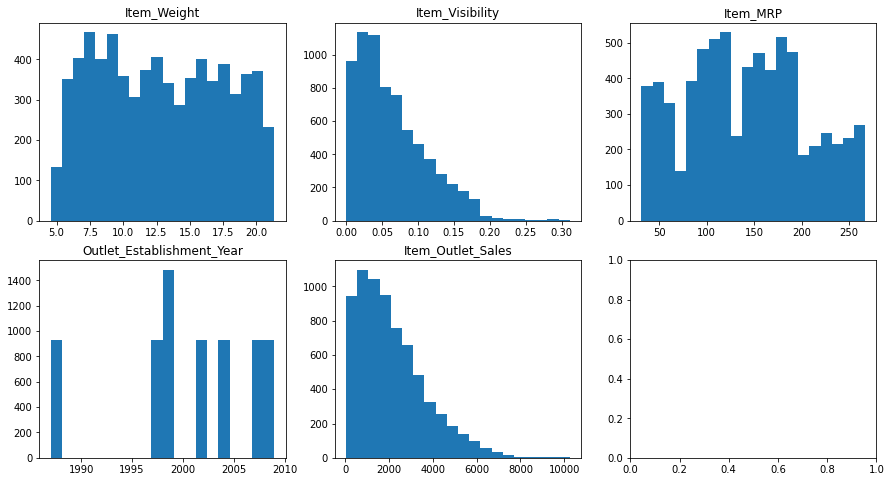

In [ ]:
fig, axes = plt.subplots(2,3, figsize=(15,8))

axes = axes.ravel()
columns = ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']
for i, col in enumerate(columns):
  axes[i].hist(df[col], bins=20)
  axes[i].set_title(col)
plt.show()

Item Visibily is string right skewed, which tells us most items have pretty low visibility, but a few have much higher visibility.  We may want to explore which items tend to more visible.

Item Outlet Sales is also right skewed.  This shows us that most outlets have sales between 0 and 4000, but a few have double to quintuple that amount.  A box plt may show signficant outliers in this variable.

Outlet Establishment Year shows an iteresting pattern with many gaps in the distribution.  This leads me to think that there are significant gaps in the data, for instand between about 1990 and 1995, 2000, and 2005 - 2006.



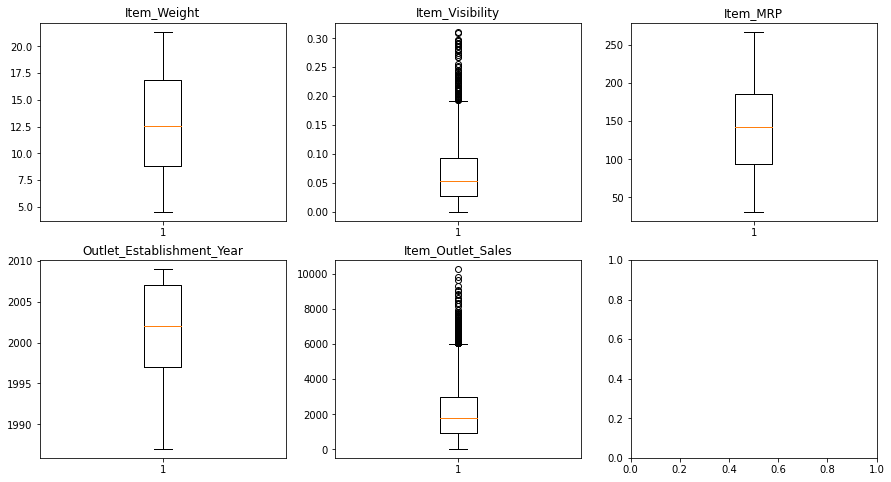

In [ ]:
fig, axes = plt.subplots(2,3, figsize=(15,8))

axes = axes.ravel()
columns = ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']
for i, col in enumerate(columns):
  axes[i].boxplot(df[col])
  axes[i].set_title(col)
plt.show()

As expected from the histograms, we see that Item Outlet Sales has many outliers above the whisker, randing from 6000 to 10000.  We also see that same tendency in Item visibility, where some items are much more visible than the median item.

We can also now see that Outlet Establishment Year is skewed somewhat to more recent years.  Most of the data was probably gathered in the 2000s.

# Correlations

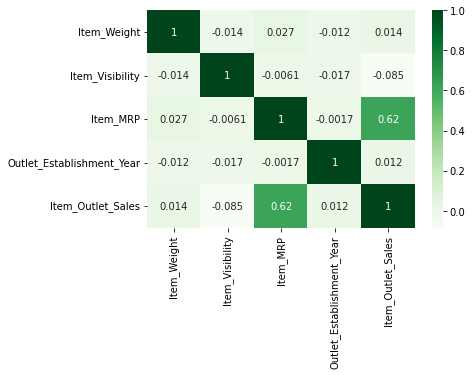

In [ ]:
corr = df.corr()
sns.heatmap(corr, cmap='Greens', annot=True)

The strongest correlation we see here a positive correlation between the maximum price of an item (MRP) and the target, Item Outlet Sales.  Apparently the higher the maximum retail price of an item, the more it sells.